In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table=df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

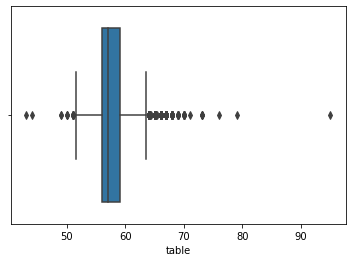

In [4]:
sns.boxplot(x=df_table);

In [5]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

In [22]:
[Q1,Q3,IQR]

[56.0, 59.0, 3.0]

In [7]:
thundershold=(df_table < Q1-1.5*IQR) | (df_table > Q3+1.5*IQR)

In [8]:
thundershold

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [17]:
df_table[thundershold]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [11]:
import pandas as pd

In [12]:
df_table = pd.DataFrame(df_table)
df_table.shape

(53940, 1)

In [15]:
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [23]:
t_df =df_table[~((df_table < Q1-IQR) | (df_table > Q3+IQR)).any(axis =1)]

In [24]:
t_df.describe()

,table
count,52668.000000
mean,57.314802
std,1.989502
min,53.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,62.000000


In [25]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [26]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [27]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [28]:
clf=LocalOutlierFactor(n_neighbors =20,contamination=0.1)
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_

In [34]:
esik_deger=np.sort(df_scores)[13]

In [35]:
aykiri_tf=df_scores>esik_deger

In [38]:
yedi_df=df[df_scores<esik_deger]

In [39]:
yedi_df

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [2]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [5]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [1]:
!pip install missingno

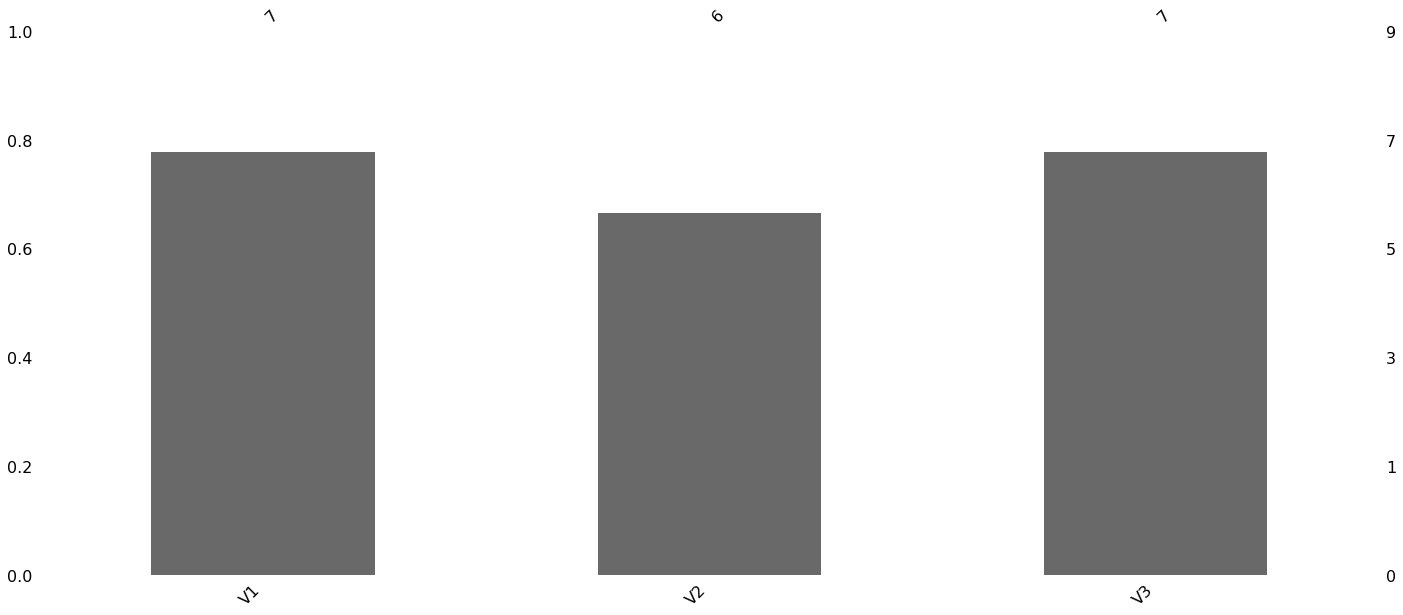

In [5]:
import missingno as msno
msno.bar(df);

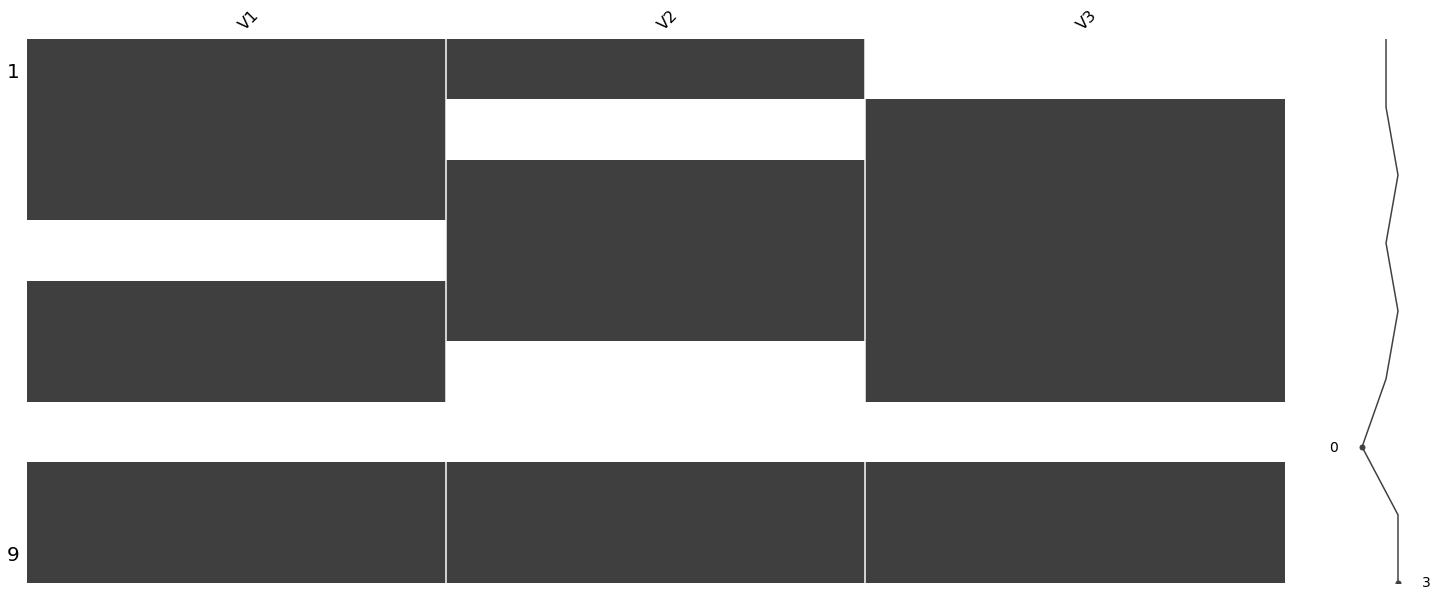

In [7]:
msno.matrix(df);

In [8]:
import seaborn as sns
df = sns.load_dataset('planets')
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [9]:
df.isnull().sum()

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


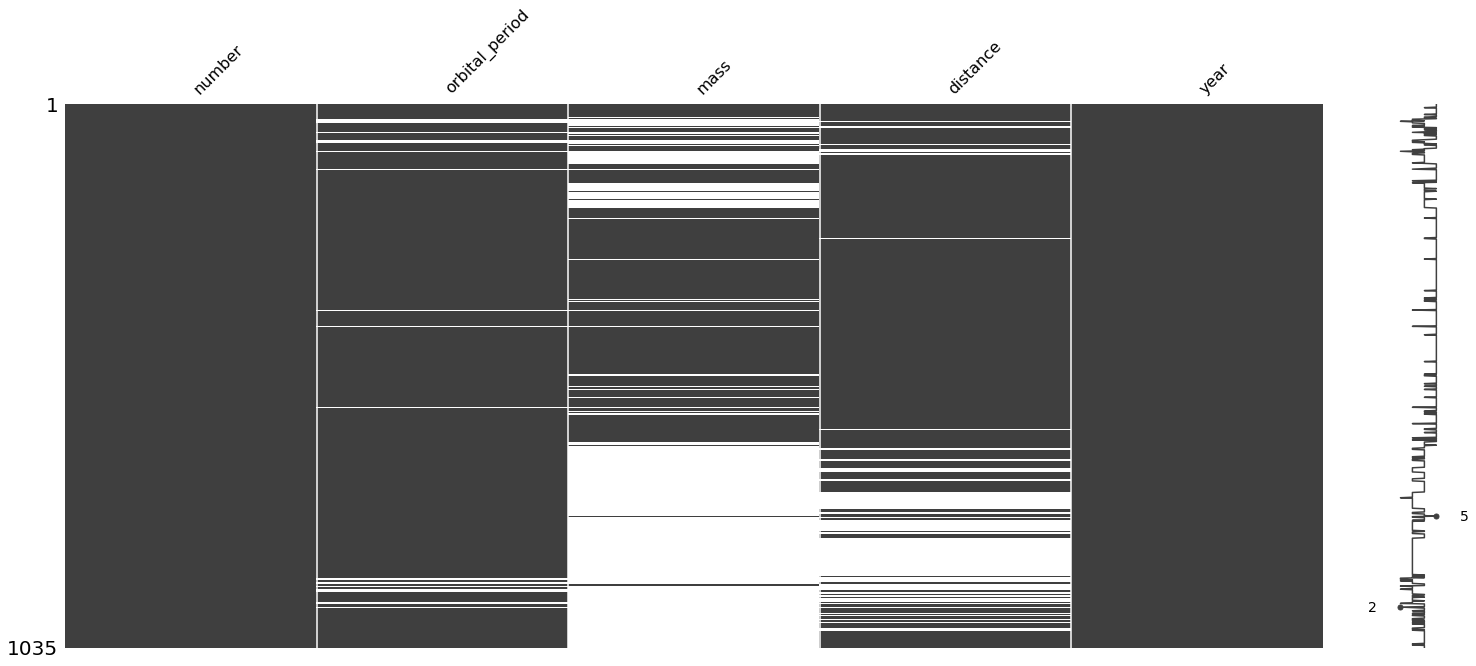

In [12]:
msno.matrix(df)

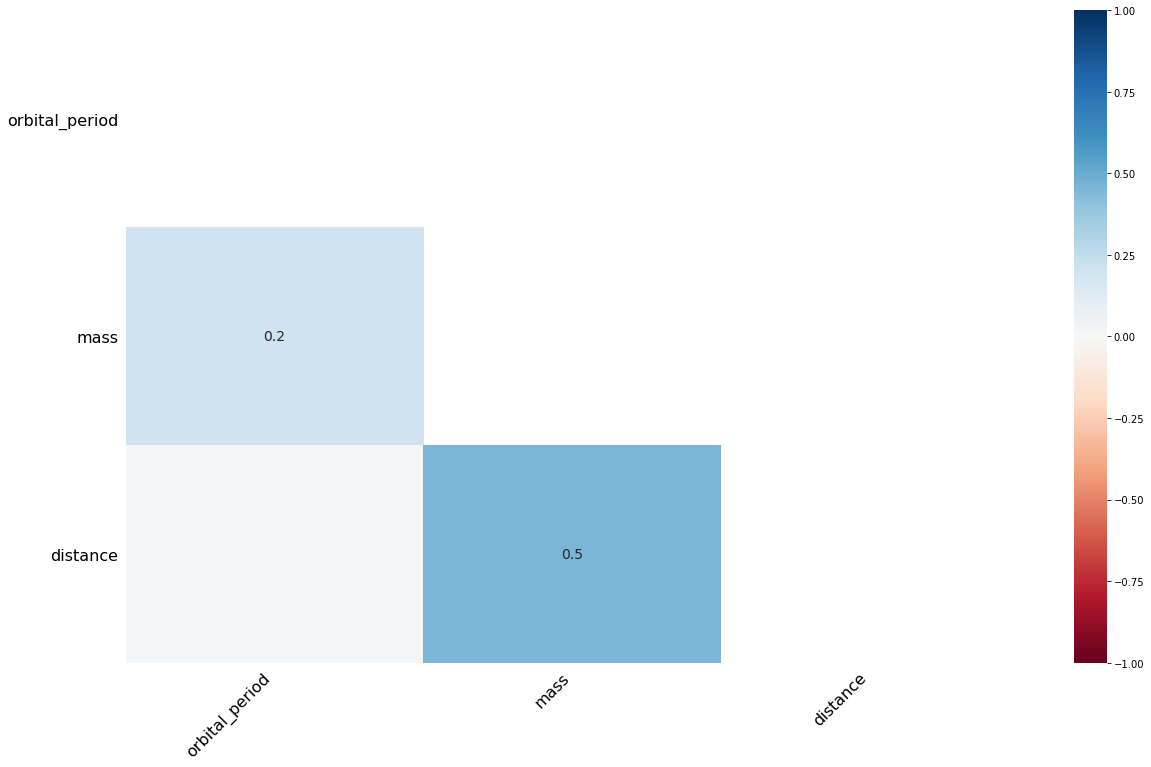

In [13]:
msno.heatmap(df);

In [15]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [16]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [17]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [20]:
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8


In [21]:
df["erase to me"]=np.nan

In [22]:
df

,V1,V2,V3,erase to me
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [23]:
df=df.dropna(axis=1,how="all")

In [26]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [27]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [29]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [33]:
df.fillna(df.mean())

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [36]:
df.fillna(df.mean()["V1":"V2"])
df.fillna(df.median()["V3"])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [37]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [39]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [40]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [41]:
df.groupby("departman")["maas"].transform("mean")

0    7.000000
1    7.000000
2    4.666667
3    4.666667
4    4.666667
5    4.666667
6    4.666667
7    7.000000
8    7.000000
Name: maas, dtype: float64

In [42]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [45]:
!pip install ycimpute==0.1.1

In [46]:
from ycimpute.imputer import knnimput

In [47]:
var_names=list(df)

In [48]:
import numpy as np
n_df =np.array(df)

In [49]:
n_df[:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [51]:
n_df.shape


(891, 6)

In [54]:
dff=knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.151
Imputing row 101/891 with 0 missing, elapsed time: 0.151
Imputing row 201/891 with 0 missing, elapsed time: 0.151
Imputing row 301/891 with 1 missing, elapsed time: 0.151
Imputing row 401/891 with 0 missing, elapsed time: 0.156
Imputing row 501/891 with 0 missing, elapsed time: 0.156
Imputing row 601/891 with 0 missing, elapsed time: 0.156
Imputing row 701/891 with 0 missing, elapsed time: 0.156
Imputing row 801/891 with 0 missing, elapsed time: 0.156


In [56]:
import pandas as pd
dff=pd.DataFrame(dff,columns=var_names)

In [57]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,22.469024,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [58]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [59]:
from ycimpute.imputer import iterforest
dff2=iterforest.IterImput().complete(n_df)

In [60]:
dff2=pd.DataFrame(dff2,columns=var_names)

In [61]:
dff2

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.00,1.0,0.0,7.2500
1,1.0,1.0,38.00,1.0,0.0,71.2833
2,1.0,3.0,26.00,0.0,0.0,7.9250
3,1.0,1.0,35.00,1.0,0.0,53.1000
4,0.0,3.0,35.00,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.00,0.0,0.0,13.0000
887,1.0,1.0,19.00,0.0,0.0,30.0000
888,0.0,3.0,25.75,1.0,2.0,23.4500
889,1.0,1.0,26.00,0.0,0.0,30.0000


In [62]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,22.469024,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [63]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [67]:
from sklearn import preprocessing as pp

In [65]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [66]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

In [68]:
pp.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [70]:
pp.MinMaxScaler(feature_range=(100,200)).fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

In [71]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
df["new_sex"]=lbe.fit_transform(df["sex"])

In [74]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [75]:
df.head()


,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [76]:
df_one_hot=pd.get_dummies(df,columns=["sex"],prefix=["sex"])
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,new_sex,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,0,1
